In [ ]:
# ============================================================================
# This code is part of Assignment 3 of ML lab (Executive M-Tech -ML Assignment-3)
# Submitted by:
#        IITP001300: Sukhvinder Singh  (email id: sukhvinder.malik13@gmail.com)
#        IITP001316: Manjit Singh Duhan (email id: duhan.manjit@gmail.com)
#        IITP001508: Atul Singh (email id: atulsingh.xcvi@gmail.com)
#============================================================================

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from math import sqrt

In [2]:
# Load the dataset from CSV
df = pd.read_csv('./insurance.csv')


# Remove the duplicate entries and Do the re-indexing of all the data
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Convert strings to digits we need to know the unique values
print("sex:    ", df['sex'].unique())
print("smoker: ", df['smoker'].unique())
print("region: ", df['region'].unique())


sex:     ['female' 'male']
smoker:  ['yes' 'no']
region:  ['southwest' 'southeast' 'northwest' 'northeast']


In [4]:
#update the strings with digit values
df['sex'] = df['sex'].apply({'male':0, 'female':1}.get)
df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)
df['region'] = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


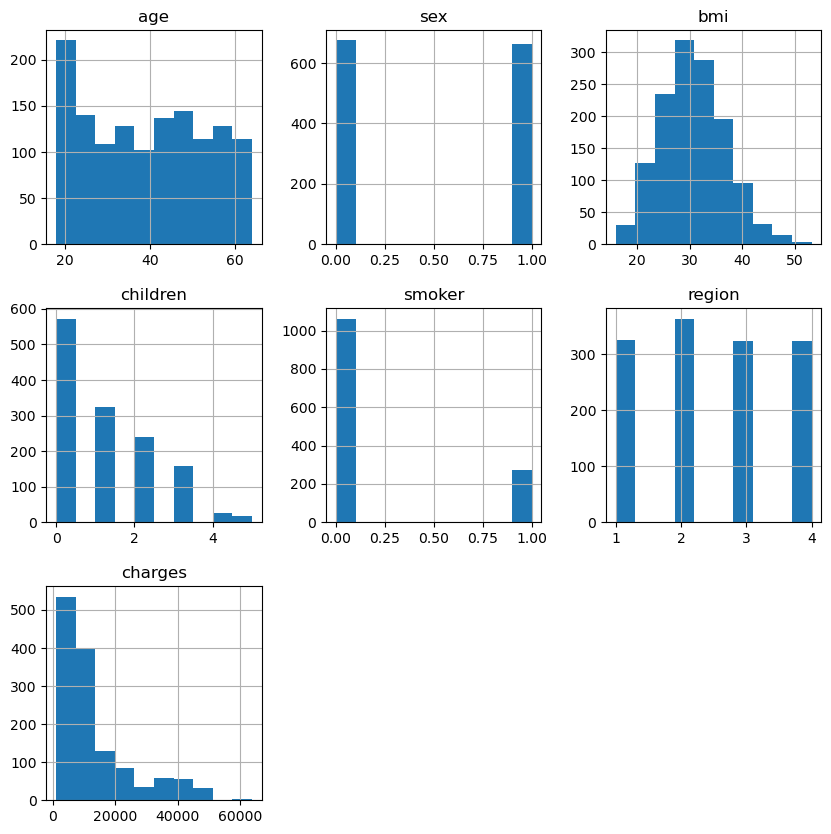

In [5]:
#Let us see the data and uniformity of the data
df.hist(bins=10, figsize=(10, 10))
plt.show()

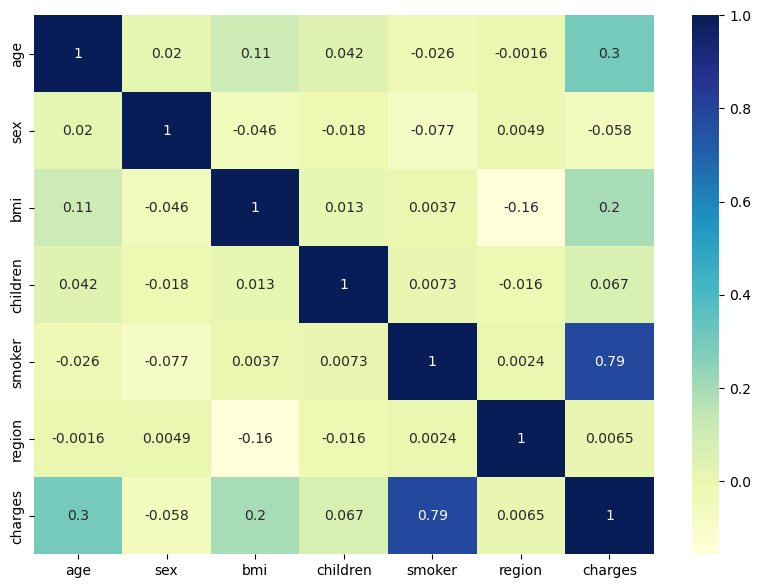

In [6]:
#Let us check correlation of the data
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [7]:
print('bmi correlation : ', df['charges'].corr(df['bmi']))
print('smoker correlation : ', df['charges'].corr(df['smoker']))
print('age correlation : ', df['charges'].corr(df['age']))

bmi correlation :  0.1984008312262494
smoker correlation :  0.787234367280032
age correlation :  0.2983082125097864


Besed on these we can say that BMI is more accurate to move ahead so, we will take only BMI & charges

In [9]:
from sklearn.model_selection import train_test_split

x_data = df["bmi"].values
y_data = df["charges"].values

#Let us split the dataset to training and testing data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3)

In [10]:
#Let us see the number of rows in each i.e. training & test data
print("X_train shape: ", x_train.shape)
print("X_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (935,)
X_test shape:  (402,)
y_train shape:  (935,)
y_test shape:  (402,)


In [11]:
class myLinearRegression() :
    
    def __init__( self ):
        self.b0 = 0
        self.b1 = 0
        self.predictions = list()

    def fit(self, x, y):
        x_mean = sum(x) / float(len(x))
        y_mean = sum(y) / float(len(y))
        n = len(x)
        numerator = 0
        denominator = 0
        
        for i in range(n):
            numerator += (x[i] - x_mean) * (y[i] - y_mean)
            denominator += (x[i] - x_mean) ** 2

        b1 = numerator / denominator
        b0 = y_mean - (b1 * x_mean)
        
        self.b0 = b0
        self.b1 = b1
    
    def predict(self, x_test):
        self.predictions.clear()
        for row in x_test:
            yhat = self.b0 + self.b1 * x_test
            self.predictions.append(yhat)
        return self.predictions
    
    def plot(self, X, Y):
        #plotting values 
        x_max = np.max(X) + 5
        x_min = np.min(X) - 5

        #calculating line values of x and y
        x = np.linspace(x_min, x_max, 1000)
        y = self.b0 + self.b1 * x

        #plotting line 
        plt.plot(x, y, color='red', label='Linear Regression')
        
        #plot the data point
        plt.scatter(X, Y, color='blue', label='Data Point')

        plt.xlabel('BMI')
        plt.ylabel('Charges')
        
        plt.legend()
        plt.show()

    
    def r_square(self, x_test, y_test):
        y_mean = np.mean(y_test)

        sumofsquares = 0
        sumofresiduals = 0
        n = len(x_test)
        
        for i in range(n) :
            y_pred = self.b0 + self.b1 * x_test[i]
            sumofsquares += (y_test[i] - y_mean) ** 2
            sumofresiduals += (y_test[i] - y_pred) **2

        score  = 1 - (sumofresiduals/sumofsquares)
        
        return score

In [12]:
my_lr = myLinearRegression()

my_lr.fit(x_train, y_train)
test_prediction = my_lr.predict(x_test)

score = my_lr.r_square(x_test, y_test)
print(score)

0.7275704833996746


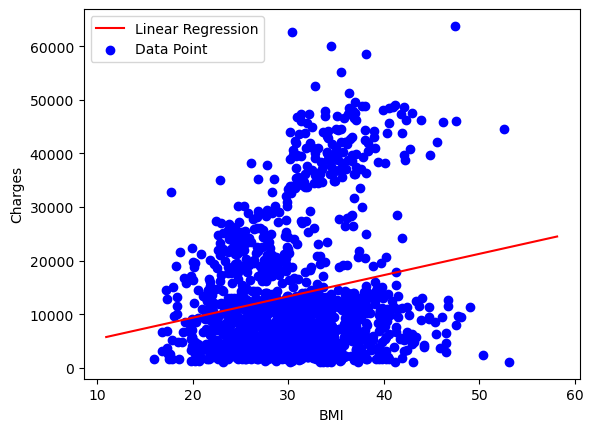

In [13]:
my_lr.plot(x_data, y_data)